## Setup

In [1]:
import numpy as np
import pathlib

import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras import layers

from ImageModel import ImageModel

# umístění dat, která chceme zpracovat
KNIHOVNIK='/Volumes/Documents/BAR/skola/diplomka/image_classification/data'

DATA_DIR='resized_images'
TRAIN_TEST_DIR = 'output'
ORIGINALS_DIR=KNIHOVNIK+'images'
LABELS=['easy', 'hard']

IMG_SIZE = 512

## Příprava dat

In [2]:
batch_size = 32

img_height = IMG_SIZE
img_width = IMG_SIZE

# tvorba trénovacího a testovacího datasetu
data_dir = pathlib.Path(TRAIN_TEST_DIR)
train_ds = tf.keras.utils.image_dataset_from_directory(
    pathlib.Path(TRAIN_TEST_DIR+'/train'),
    shuffle=False,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    pathlib.Path(TRAIN_TEST_DIR+'/val'),
    shuffle=False,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 341 files belonging to 2 classes.
Metal device set to: Apple M1
Found 86 files belonging to 2 classes.


2022-06-20 18:09:27.880928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-20 18:09:27.881049: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-06-20 18:09:27.912415: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


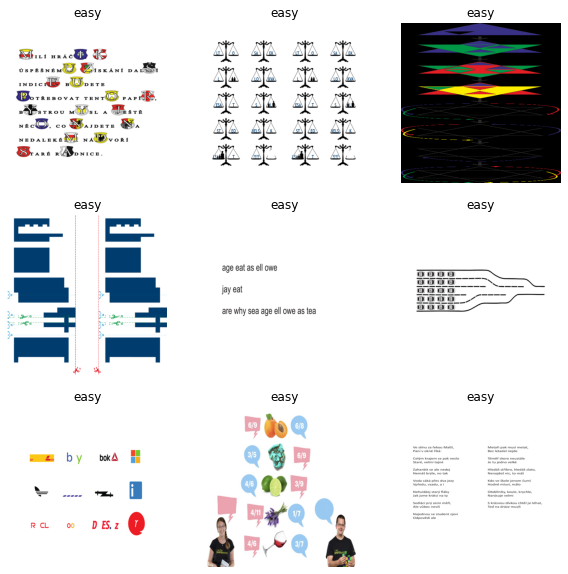

In [3]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]


2022-06-20 18:09:28.420330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-06-20 18:09:28.462588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-06-20 18:09:28.478759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-06-20 18:09:28.572008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-06-20 18:09:28.591407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


## Tvorba modelu a srovnání s dosud nejlepším

In [8]:
im_model_prev=ImageModel(LABELS, IMG_SIZE)
im_model_prev.load_weights()

In [6]:
im_model=ImageModel(LABELS, IMG_SIZE)
im_model.train_model(train_ds, val_ds)

Epoch 1/15


2022-06-20 18:09:38.080021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 45.5086 - accuracy: 0.5601

2022-06-20 18:09:45.187340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 8s 698ms/step - loss: 45.5086 - accuracy: 0.5601 - val_loss: 1.1647 - val_accuracy: 0.5000
Epoch 2/15
11/11 [==============================] - 7s 679ms/step - loss: 0.7184 - accuracy: 0.5425 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 3/15
11/11 [==============================] - 7s 682ms/step - loss: 0.6766 - accuracy: 0.5718 - val_loss: 0.6846 - val_accuracy: 0.5930
Epoch 4/15
11/11 [==============================] - 7s 675ms/step - loss: 0.6850 - accuracy: 0.5249 - val_loss: 0.6870 - val_accuracy: 0.5349
Epoch 5/15
11/11 [==============================] - 7s 678ms/step - loss: 0.6667 - accuracy: 0.5982 - val_loss: 0.6818 - val_accuracy: 0.6047
Epoch 6/15
11/11 [==============================] - 7s 677ms/step - loss: 0.6508 - accuracy: 0.5572 - val_loss: 0.6821 - val_accuracy: 0.6279
Epoch 7/15
11/11 [==============================] - 7s 667ms/step - loss: 0.6437 - accuracy: 0.6276 - val_loss: 0.6812 - val_accuracy: 0.6047
Epoch 8/15
11/11

In [9]:
prev_loss, prev_acc = im_model_prev.model.evaluate(val_ds, verbose=2)

2022-06-20 18:12:08.161743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 - 1s - loss: 0.7496 - accuracy: 0.6279 - 1s/epoch - 339ms/step


In [7]:
loss, acc = im_model.model.evaluate(val_ds, verbose=2)
prev_loss, prev_acc = im_model_prev.model.evaluate(val_ds, verbose=2)

if acc>prev_acc:
    im_model.save_weights()

3/3 - 1s - loss: 0.7496 - accuracy: 0.6279 - 683ms/epoch - 228ms/step


2022-06-20 18:11:39.003684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 - 1s - loss: 0.8867 - accuracy: 0.6047 - 687ms/epoch - 229ms/step
